In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
import urllib.request as url

import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if 'GPU' not in device_name:
  print('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/train_df.csv', sep = ',', index_col = 0)
validation_df = pd.read_csv('/content/drive/MyDrive/validation_df.csv', sep = ',', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/test_df.csv', sep = ',', index_col = 0)

In [5]:
train_df = train_df[train_df.finding_labels != 'No Finding']
validation_df = validation_df[validation_df.finding_labels != 'No Finding']
test_df = test_df[test_df.finding_labels != 'No Finding']

In [6]:
infiltration, _ = train_test_split(train_df[train_df.finding_labels == 'Infiltration'], test_size = 0.94)
atelectasis, _ = train_test_split(train_df[train_df.finding_labels == 'Atelectasis'], test_size = 0.85)
effusion, _ = train_test_split(train_df[train_df.finding_labels == 'Effusion'], test_size = 0.85)
nodule, _ = train_test_split(train_df[train_df.finding_labels == 'Nodule'], test_size = 0.78)
pneumothorax, _ = train_test_split(train_df[train_df.finding_labels == 'Pneumothorax'], test_size = 0.72)
consolidation, _ = train_test_split(train_df[train_df.finding_labels == 'Consolidation'], test_size = 0.55)
pleural_thickening, _ = train_test_split(train_df[train_df.finding_labels == 'Pleural_Thickening'], test_size = 0.45)
emphysema, _ = train_test_split(train_df[train_df.finding_labels == 'Emphysema'], test_size = 0.32)
fibrosis, _ = train_test_split(train_df[train_df.finding_labels == 'Fibrosis'], test_size = 0.16)  
edema = train_df[train_df.finding_labels == 'Edema']   
train_df = pd.concat([infiltration, atelectasis, effusion, nodule, pneumothorax, consolidation,
                   pleural_thickening, emphysema, fibrosis, edema])
train_df['finding_labels'].value_counts()      

Atelectasis           585
Edema                 578
Pneumothorax          566
Pleural_Thickening    565
Fibrosis              563
Emphysema             556
Consolidation         550
Nodule                549
Effusion              546
Infiltration          526
Name: finding_labels, dtype: int64

In [7]:
infiltration, _ = train_test_split(validation_df[validation_df.finding_labels == 'Infiltration'], test_size = 0.94)
atelectasis, _ = train_test_split(validation_df[validation_df.finding_labels == 'Atelectasis'], test_size = 0.85)
effusion, _ = train_test_split(validation_df[validation_df.finding_labels == 'Effusion'], test_size = 0.85)
nodule, _ = train_test_split(validation_df[validation_df.finding_labels == 'Nodule'], test_size = 0.78)
pneumothorax, _ = train_test_split(validation_df[validation_df.finding_labels == 'Pneumothorax'], test_size = 0.72)
consolidation, _ = train_test_split(validation_df[validation_df.finding_labels == 'Consolidation'], test_size = 0.55)
pleural_thickening, _ = train_test_split(validation_df[validation_df.finding_labels == 'Pleural_Thickening'], test_size = 0.45)
emphysema, _ = train_test_split(validation_df[validation_df.finding_labels == 'Emphysema'], test_size = 0.32)
fibrosis, _ = train_test_split(validation_df[validation_df.finding_labels == 'Fibrosis'], test_size = 0.16)  
edema = validation_df[validation_df.finding_labels == 'Edema']   
validation_df = pd.concat([infiltration, atelectasis, effusion, nodule, pneumothorax, consolidation,
                   pleural_thickening, emphysema, fibrosis, edema])
validation_df['finding_labels'].value_counts()      

Edema                 35
Pleural_Thickening    31
Emphysema             31
Atelectasis           29
Effusion              29
Infiltration          29
Fibrosis              28
Nodule                26
Pneumothorax          25
Consolidation         24
Name: finding_labels, dtype: int64

In [8]:
infiltration, _ = train_test_split(test_df[test_df.finding_labels == 'Infiltration'], test_size = 0.94)
atelectasis, _ = train_test_split(test_df[test_df.finding_labels == 'Atelectasis'], test_size = 0.85)
effusion, _ = train_test_split(test_df[test_df.finding_labels == 'Effusion'], test_size = 0.85)
nodule, _ = train_test_split(test_df[test_df.finding_labels == 'Nodule'], test_size = 0.78)
pneumothorax, _ = train_test_split(test_df[test_df.finding_labels == 'Pneumothorax'], test_size = 0.72)
consolidation, _ = train_test_split(test_df[test_df.finding_labels == 'Consolidation'], test_size = 0.55)
pleural_thickening, _ = train_test_split(test_df[test_df.finding_labels == 'Pleural_Thickening'], test_size = 0.45)
emphysema, _ = train_test_split(test_df[test_df.finding_labels == 'Emphysema'], test_size = 0.32)
fibrosis, _ = train_test_split(test_df[test_df.finding_labels == 'Fibrosis'], test_size = 0.16)  
edema = test_df[test_df.finding_labels == 'Edema']   
test_df = pd.concat([infiltration, atelectasis, effusion, nodule, pneumothorax, consolidation,
                   pleural_thickening, emphysema, fibrosis, edema])
test_df['finding_labels'].value_counts()      

Pleural_Thickening    22
Pneumothorax          22
Emphysema             19
Fibrosis              18
Nodule                18
Atelectasis           17
Infiltration          17
Effusion              16
Edema                 15
Consolidation         13
Name: finding_labels, dtype: int64

In [9]:
edema = train_df[train_df.finding_labels == 'Edema']
edema['class_name'] =  1
others = train_df[train_df.finding_labels != 'Edema']
others = train_df[train_df.finding_labels != 'No finding']
others['class_name'] = 0
others , _ = train_test_split(others, test_size = 0.9, random_state = 42, 
                               shuffle = True, stratify = others['finding_labels'])
train_df_ = pd.concat([edema, others])

In [10]:
edema = validation_df[validation_df.finding_labels == 'Edema']
edema['class_name'] =  1
others = validation_df[validation_df.finding_labels != 'Edema']
others = validation_df[validation_df.finding_labels != 'No finding']
others['class_name'] = 0
others , _ = train_test_split(others, test_size = 0.9, random_state = 42, 
                               shuffle = True, stratify = others['finding_labels'])
validation_df_ = pd.concat([edema, others])

In [11]:
edema = test_df[test_df.finding_labels == 'Edema']
edema['class_name'] =  1
others = test_df[test_df.finding_labels != 'Edema']
others = test_df[test_df.finding_labels != 'No finding']
others['class_name'] = 0
others , _ = train_test_split(others, test_size = 0.9, random_state = 42, 
                               shuffle = True, stratify = others['finding_labels'])
test_df_ = pd.concat([edema, others])

In [12]:
image_generator = ImageDataGenerator(rescale = 1/255, samplewise_center = True, 
                                     samplewise_std_normalization = True,
                                     horizontal_flip = True,
                                     vertical_flip = False,
                                     height_shift_range = 0.05,
                                     width_shift_range = 0.1,
                                     rotation_range = 5,
                                     shear_range = 0.1,
                                     fill_mode = 'reflect',
                                     zoom_range = 0.15)

train_generator = image_generator.flow_from_dataframe(
                                                      dataframe = train_df_,
                                                      directory = '',
                                                      x_col = 'Image Index',
                                                      y_col = 'class_name',
                                                      batch_size = 32,
                                                      seed = 42,
                                                      shuffle = True,
                                                      class_mode = 'raw',
                                                      target_size = (256, 256))

test_datagen = ImageDataGenerator(samplewise_center = True, 
                                  samplewise_std_normalization = True)

valid_generator = test_datagen.flow_from_dataframe(
                                                      dataframe = validation_df_,
                                                      directory = '.', 
                                                      x_col = 'Image Index',
                                                      y_col = 'class_name',
                                                      batch_size = 32,
                                                      seed = 42,
                                                      shuffle = True,
                                                      class_mode = 'raw',
                                                      target_size = (256, 256))

test_generator = test_datagen.flow_from_dataframe(
                                                  dataframe = test_df_, 
                                                  directory = '.',
                                                  x_col = 'Image Index',
                                                  y_col = 'class_name',
                                                  batch_size = 32,
                                                  seed = 42,
                                                  shuffle = True,
                                                  class_mode = 'raw',
                                                  target_size = (256, 256))

Found 1136 validated image filenames.
Found 63 validated image filenames.
Found 32 validated image filenames.


In [13]:
model = MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = 'imagenet')
x = tf.keras.layers.GlobalAveragePooling2D()(model.output)
x = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(x)

model = tf.keras.models.Model(inputs = model.input, outputs = x)

In [14]:
filepath = "/content/drive/MyDrive/experimentos/multilabel/edema/transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

In [15]:
callbacks = [checkpoint]

In [16]:
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.0001), loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [17]:
history = model.fit(train_generator, steps_per_epoch = 1136 // 32, 
                    validation_data = valid_generator, validation_steps = 63 // 32,
                    callbacks = callbacks, epochs = 20)

Epoch 1/20
35/35 [==============================] - 273s 8s/step - loss: 0.6091 - acc: 0.6683 - val_loss: 0.5493 - val_acc: 0.7500

Epoch 00001: val_acc improved from -inf to 0.75000, saving model to /content/drive/MyDrive/experimentos/multilabel/edema/transferlearning_weights.hdf5
Epoch 2/20
35/35 [==============================] - 30s 856ms/step - loss: 0.4589 - acc: 0.7819 - val_loss: 0.7697 - val_acc: 0.6875

Epoch 00002: val_acc did not improve from 0.75000
Epoch 3/20
35/35 [==============================] - 30s 847ms/step - loss: 0.4387 - acc: 0.8059 - val_loss: 0.7731 - val_acc: 0.5625

Epoch 00003: val_acc did not improve from 0.75000
Epoch 4/20
35/35 [==============================] - 30s 843ms/step - loss: 0.3858 - acc: 0.8324 - val_loss: 0.6490 - val_acc: 0.6875

Epoch 00004: val_acc did not improve from 0.75000
Epoch 5/20
35/35 [==============================] - 30s 846ms/step - loss: 0.3660 - acc: 0.8429 - val_loss: 0.7331 - val_acc: 0.7500

Epoch 00005: val_acc did not im

In [18]:
model.evaluate(test_generator)

1/1 [==============================] - 1s 519ms/step - loss: 0.9618 - acc: 0.7188


[0.9617717266082764, 0.71875]

In [19]:
(x,y) = test_generator[0]

In [21]:
predict = model.predict(x)

In [22]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

def thresholds(limiar, predict):
  '''predição para diferentes thresholds'''

  predict_ = []
  for i in predict:
    if i > limiar:
      predict_.append(1)
    else:
      predict_.append(0)
  
  return predict_

def precision_recall_accuracy_curve(predict, y):
  ''' Relaciona a curva da Precisão, Sensibilidade e Acurácia em relação a diferentes Thresholds'''

  limiares = np.arange(0, 1, 0.05)
  predicts = []
  precisions = []
  recalls = []
  accuracy = []
  flag = 0
  for i in limiares:
    predicts.append(thresholds(i, predict))
    precisions.append(precision_score(predicts[flag], y))
    recalls.append(recall_score(predicts[flag], y))
    accuracy.append(accuracy_score(predicts[flag], y))
    flag += 1
  
  return precisions, recalls, accuracy

def plot_precision_recall_accuracy_curve(precisions, recalls, accuracy):
  '''Plotando a curva de Precisão, Sensibilidade e Acurácia'''

  plt.figure(figsize = (10,5))
  plt.plot(np.arange(0, 1, 0.05), precisions, label = 'Precision')
  plt.plot(np.arange(0, 1, 0.05), recalls, label = 'Recall')
  plt.plot(np.arange(0, 1, 0.05), accuracy, label = 'Accuracy')
  plt.title('Precisão, Sensibilidade e Acurácia para diferentes Thresholds')
  plt.xlabel('Thresholds')
  plt.legend()
  plt.savefig('curve-analysis')

  return None

def best_metrics(threshold, predict, y):
  '''Melhores valores para o threshold escolhido'''

  predict_ = thresholds(threshold, predict)
  print('Matriz de Confusão:\n', confusion_matrix(predict_, y))
  print('Acurácia:', accuracy_score(predict_, y))
  print('Precisão', precision_score(predict_, y))
  print('Sensibilidade:', recall_score(predict_, y)) 
  print('F1_Score:', f1_score(predict_, y))

  return None

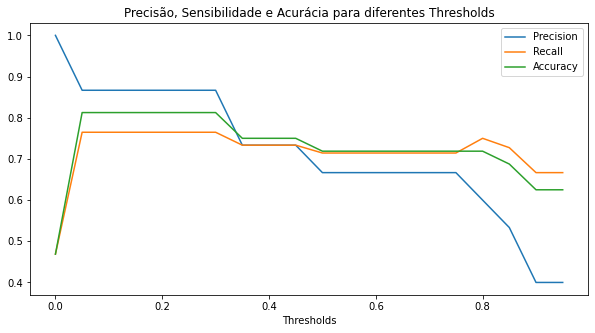

In [23]:
# plotando a curva da Precisão, Sensibilidade e Acurácia 
precisions, recalls, accuracy = precision_recall_accuracy_curve(predict, y)
plot_precision_recall_accuracy_curve(precisions, recalls, accuracy)

In [24]:
# analisando as melhores métricas encontradas para o modelo
best_metrics(threshold = 0.20, predict = predict, y = y)

Matriz de Confusão:
 [[13  2]
 [ 4 13]]
Acurácia: 0.8125
Precisão 0.8666666666666667
Sensibilidade: 0.7647058823529411
F1_Score: 0.8125


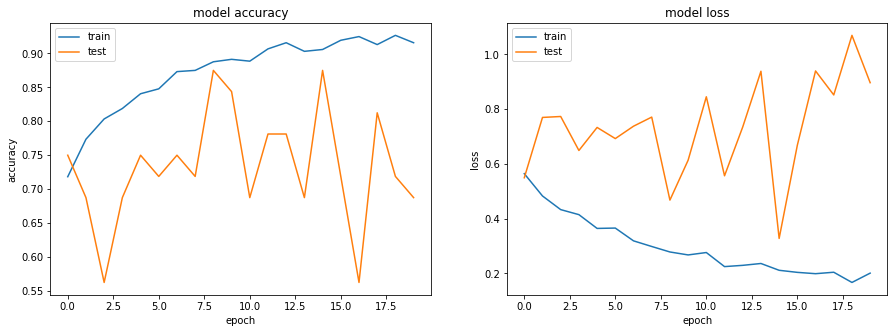

In [25]:
# visualizando o ganho de acurácia durante o treinamento
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model-accuracy')

# visualizando o decaimento da função de custo durante o treinamento 
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model-loss')

In [26]:
model.save('/content/drive/MyDrive/experimentos/multilabel/edema/model1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/experimentos/multilabel/edema/model1/assets


In [27]:
model.load_weights('/content/drive/MyDrive/experimentos/multilabel/edema/transferlearning_weights.hdf5')

In [28]:
model.evaluate(test_generator)

1/1 [==============================] - 1s 535ms/step - loss: 0.9702 - acc: 0.8438


[0.9701976776123047, 0.84375]

In [29]:
predict = model.predict(x)

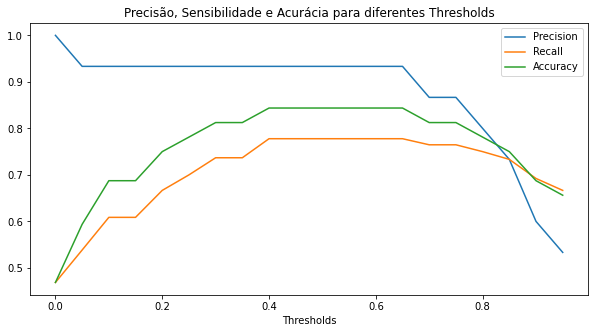

In [30]:
# plotando a curva da Precisão, Sensibilidade e Acurácia 
precisions, recalls, accuracy = precision_recall_accuracy_curve(predict, y)
plot_precision_recall_accuracy_curve(precisions, recalls, accuracy)

In [31]:
# analisando as melhores métricas encontradas para o modelo
best_metrics(threshold = 0.50, predict = predict, y = y)

Matriz de Confusão:
 [[13  1]
 [ 4 14]]
Acurácia: 0.84375
Precisão 0.9333333333333333
Sensibilidade: 0.7777777777777778
F1_Score: 0.8484848484848485


In [32]:
model.save('/content/drive/MyDrive/experimentos/multilabel/edema/model2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/experimentos/multilabel/edema/model2/assets
